# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="300px" height="250px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="250px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- https://repositorio.unal.edu.co/handle/unal/8418?show=full

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="250px" height="300px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="175px" />

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

In [1]:
# Paso 1. Identificar el criterio de optimización (minimizar o maximizar)
#         minimizar coste
# Paso 2. Definir las variables que me ayuden a encontrar el objetivo
#         Las variables deben representar masa (en gramos)
#         Variables: xA -> cantidad en gramos del producto A
#                    xB -> cantidad en gramos del producto B
# Paso 3. Definir el criterio de optimización:
def coste(xA,xB):
  return 0.6*xA + 0.2*xB
# Paso 4. Identificar las restricciones en función de las variables definidas
# Nota importante: Definir las ecuaciones en el mismo orden que el criterio de optimización
#
#         Proteinas:  0.3*xA+0.05*xB >= 25 (gramos)
#         Grasas:    0.01*xA+0.07*xB >= 6
#         Azucares:   0.1*xA+0.1*xB  >= 30
def proteinas(xA):
  return (25-0.3*xA)/0.05
def grasas(xA):
  return (6-0.01*xA)/0.07
def azucares(xA):
  return (30-0.1*xA)/0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

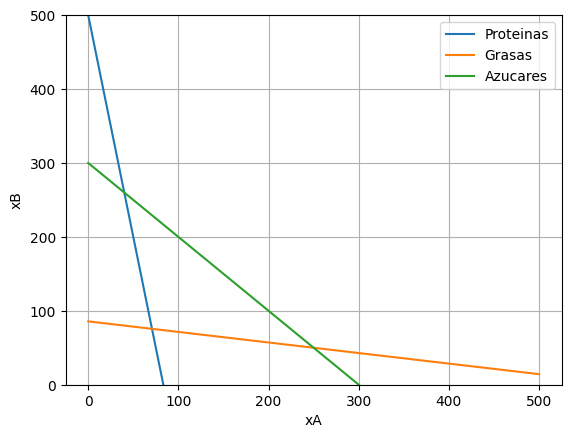

In [7]:
# Gráficas
xA=np.linspace(0,500,100)
plt.plot(xA,proteinas(xA),label='Proteinas')
plt.plot(xA,grasas(xA),label='Grasas')
plt.plot(xA,azucares(xA),label='Azucares')
plt.legend()
plt.ylim(0,500)
plt.xlabel('xA')
plt.ylabel('xB')
plt.grid()

In [8]:
# Evaluamos en 4 puntos:
# 1. el punto donde xA=0
# 2. el cruce de las restricciones entre proteinas y azucares
# 3. el cruce de las restricciones entre grasas y azucares
# 4. el punto donde xB=0 en la restricción de grasas
#
# punto 1
proteinas(0) # punto en xB donde xA=0

500.0

In [9]:
coste(0,proteinas(0)) # Costo del primer punto

100.0

In [10]:
import sympy as sym

In [11]:
# punto 2
# Encontramos la solución para 'xA'
xA=sym.Symbol('xA')
sym.solve(proteinas(xA)-azucares(xA),xA)

[40.0000000000000]

In [12]:
# Para encontrar 'xB' evaluamos xA=40 en la función de proteinas o azucares
azucares(40),proteinas(40)

(260.0, 260.0)

In [13]:
coste(40,azucares(40))

76.0

In [14]:
# Punto 3
sym.solve(grasas(xA)-azucares(xA),xA)

[250.000000000000]

In [16]:
coste(250,azucares(250))

160.0

In [17]:
# Punto 4
sym.solve(grasas(xA),xA)

[600.000000000000]

In [18]:
# xB=0
grasas(600)

0.0

In [19]:
coste(600,0)

360.0

**Resultado:**

El costo mínimo del compuesto es de 76 u.m. y se consigo con 40 gramos del producto **A** y 260 gramos de **B**.

---

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves.

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias?

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería.

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

El problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

O de forma equivalente:

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudiante, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, pase al frente para explicarlo y le subiré la nota de alguna tarea a 100.**

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente:

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

## 5. Otro problema de dieta
A una persona que quiere adelgazar se le ofrecen dos productos, $A$ y $B$, para que tome una mezcla de ambos con las siguientes recomendaciones:
* No debe tomar más de $150$ g de la mezcla ni menos de $50$ g.
* La cantidad de $A$ debe ser igual o superior a la de $B$.
* No debe incluir más de $100$ g de $A$.

Si $100$ g de $A$ contiene $30$ mg de vitaminas y $450$ calorías y, $100$ g de $B$ contienen 20 mg de vitaminas y $150$ calorías:
* ¿Cuántos gramos de cada producto debe mezclar para obtener el preparado más rico en
vitaminas?
* ¿Y el más pobre en calorías?